In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

: 

In [ ]:
api = pd.read_csv('../data/API_merged.csv')
steam = pd.read_csv('../data/steam_final_dataset.csv')

: 

In [ ]:
api

,id,name,slug,games_count,image_background,released,tba,rating,rating_top,ratings_count,...,platforms_count,genres,stores,tags,esrb_rating,background_image,added,suggestions_count,updated,domain
0,1612,Valve Software,valve-software,44.0,https://media.rawg.io/media/games/46d/46d98e69...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,405,Ubisoft,ubisoft,349.0,https://media.rawg.io/media/games/5e4/5e4bff02...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18893,Feral Interactive,feral-interactive,107.0,https://media.rawg.io/media/screenshots/375/37...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3709,Ubisoft Montreal,ubisoft-montreal,121.0,https://media.rawg.io/media/games/99b/99b39612...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4132,Square Enix,square-enix,370.0,https://media.rawg.io/media/games/943/9432de38...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5031,6,Nintendo Store,nintendo,9141.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nintendo.com
5032,7,Xbox 360 Store,xbox360,1915.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,marketplace.xbox.com
5033,8,Google Play,google-play,17124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,play.google.com
5034,9,itch.io,itch,654175.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,itch.io


In [ ]:
steam

,title,release,price,url,error
0,KungFu Kickball,9 фев. 2022 г.,700 руб.,https://store.steampowered.com/app/1004620/Kun...,NaN
1,Foregone,1 мар. 2021 г.,435 руб.,https://store.steampowered.com/app/1000760/For...,NaN
2,Roombo: First Blood,7 авг. 2019 г.,200 руб.,https://store.steampowered.com/app/1004610/Roo...,NaN
3,cat notebook,1 фев. 2019 г.,133 руб.,https://store.steampowered.com/app/1003490/cat...,NaN
4,Drawngeon: Dungeons of Ink and Paper,24 мая. 2019 г.,200 руб.,https://store.steampowered.com/app/1000470/Dra...,NaN
...,...,...,...,...,...
10016,DRAGON BALL: THE BREAKERS,13 окт. 2022 г.,849 руб.,https://store.steampowered.com/app/1276760/DRA...,NaN
10017,NaN,NaN,NaN,https://store.steampowered.com/app/1281590/The...,Message: no such element: Unable to locate ele...
10018,Astral Ascent,14 ноя. 2023 г.,600 руб.,https://store.steampowered.com/app/1280930/Ast...,NaN
10019,Губка Боб Квадратные Штаны: The Cosmic Shake,31 янв. 2023 г.,1999 руб.,https://store.steampowered.com/app/1282150/Gub...,NaN


Мы получили **2 датасета**. Теперь перед нами стоит задача - обьеденить их, почтистить, т.е. **привести его к готовому датасету для дальнейшего анализа**.


1.   Первым делом мы проверим оба датасета на дубликаты, при их наличии - удалим их.
Как нам показал ГП 1, дубликатов в датасете может быть очень много
2.  Далее мы поработаем с пропусками. Проанализировав датасеты, мы пришли к такому выводу по работе с пропусками в разных столбацах:

*   domain, image_background, games_count — технические, можно удалить;
*   esrb_rating, metacritic, tags, genres — полезные, но частично неполные;
* metacritic можно заполнить медианой;
* esrb_rating, genres, tags — категорией "Unknown";
* genres, tags — строкой "Unknown" или "No data";


Cначала проделаем эти махинации с датасетом **api**:

In [ ]:
# Количество дубликатов
duplicates_api = api.duplicated().sum()
print(f"Количество дубликатов: {duplicates_api}")

api = api.drop_duplicates(subset="name").reset_index(drop=True)

# Заполнение пропусков
if "rating" in api.columns:
    api["rating"] = api["rating"].fillna(api["rating"].median())

if "esrb_rating" in api.columns:
    api["esrb_rating"] = api["esrb_rating"].fillna("Unknown")

if "tba" in api.columns:
    api["tba"] = api["tba"].fillna(False)

if "ratings_count" in api.columns:
    api["ratings_count"] = api["ratings_count"].fillna(0)

cols_to_drop = ["domain", "image_background", "games_count", "background_image", "updated"]
api = api.drop(columns=[c for c in cols_to_drop if c in api.columns], errors="ignore")

fill_unknown = ["genres", "tags", "stores", "esrb_rating", "released"]
for col in fill_unknown:
    if col in api.columns:
        api[col] = api[col].fillna("Unknown")

fill_median = ["rating", "rating_top", "metacritic", "playtime", "platforms_count", "added", "suggestions_count"]
for col in fill_median:
    if col in api.columns:
        if 'genres' in api.columns:
            api[col] = api.groupby('genres')[col].transform(lambda x: x.fillna(x.median()))
        else:
            api[col] = api[col].fillna(api[col].median())



print("\nПропуски после очистки:")
print(api.isna().sum().sort_values(ascending=False).head(10))



Количество дубликатов: 0


/tmp/ipython-input-1520898297.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  api["tba"] = api["tba"].fillna(False)



Пропуски после очистки:
metacritic       311
id                 0
name               0
released           0
slug               0
tba                0
rating             0
rating_top         0
ratings_count      0
playtime           0
dtype: int64


Теперь проделаем эти махинации с датасетом **steam**:

In [ ]:
# Количество дубликатов
duplicates_count_steam = steam.duplicated().sum()
print(f"Количество дубликатов: {duplicates_count_steam}")

# Удаление дубликатов по названию
steam = steam.drop_duplicates(subset="title").reset_index(drop=True)

# Заполнение пропусков
if "price" in steam.columns:
    steam["price"] = steam["price"].fillna("Unknown")

if "release" in steam.columns:
    steam["release"] = steam["release"].fillna("Unknown")


print("\nПропуски после очистки:")
print(steam.isna().sum().sort_values(ascending=False).head(10))

Количество дубликатов: 3218

Пропуски после очистки:
error      6582
title         1
release       0
price         0
url           0
dtype: int64


Мы почистили полученные нами датасеты. Теперь нам нужно их обьеденить в 1. (Который впоследствии я назову video_games)
Конечно же, обьединять их мы будем *по названию игры*. Но, чтобы не возникло никаких ошибок, мы должны привести все названия *к единому виду*:


*   Привести все к нижнему регистру
*   Удаляем лишние пробелы
*   Удаляем спецсимволы

После этого мы спокойно можем обьеденить 2 датасета: **api и steam в 1 датасет: video_games** (по названию игр)

In [ ]:
def clean_title(title):
    if pd.isna(title):
        return None
    title = title.lower().strip()
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    title = re.sub(r'\s+', ' ', title)
    return title

api["clean_name"] = api["name"].apply(clean_title)
steam["clean_name"] = steam["title"].apply(clean_title)

api = api.dropna(subset=["clean_name"])
steam = steam.dropna(subset=["clean_name"])


video_games = pd.merge(
    api,
    steam,
    on="clean_name",
    how="inner",
    suffixes=("_api", "_steam")
)


In [ ]:
video_games

,id,name,slug,released,tba,rating,rating_top,ratings_count,metacritic,playtime,...,tags,esrb_rating,added,suggestions_count,clean_name,title,release,price,url,error
0,4200,Portal 2,portal-2,2011-04-18,False,4.58,5.0,6005.0,95.0,11.0,...,"Singleplayer, Для одного игрока, Экшен, Приклю...",Everyone 10+,20739.0,567.0,portal 2,Portal 2,18 апр. 2011 г.,385 руб.,https://store.steampowered.com/app/620/Portal_2/,NaN
1,12020,Left 4 Dead 2,left-4-dead-2,2009-11-17,False,4.09,4.0,3376.0,89.0,9.0,...,"Singleplayer, Для одного игрока, Экшен, Приклю...",Mature,17442.0,607.0,left 4 dead 2,Left 4 Dead 2,16 ноя. 2009 г.,385 руб.,https://store.steampowered.com/app/550/Left_4_...,NaN
2,13537,Half-Life 2,half-life-2,2004-11-16,False,4.48,5.0,4038.0,96.0,7.0,...,"Singleplayer, Для одного игрока, Экшен, Приклю...",Mature,15988.0,570.0,halflife 2,Half-Life 2,16 ноя. 2004 г.,385 руб.,https://store.steampowered.com/app/220/HalfLif...,NaN
3,32,Destiny 2,destiny-2,2017-09-06,False,3.52,4.0,2658.0,82.0,6.0,...,"Singleplayer, Для одного игрока, Экшен, Приклю...",Teen,14558.0,1244.0,destiny 2,Destiny 2,1 окт. 2019 г.,Бесплатно,https://store.steampowered.com/app/1085660/Des...,NaN
4,1030,Limbo,limbo,2010-07-21,False,4.14,4.0,3370.0,88.0,3.0,...,"Singleplayer, Для одного игрока, Экшен, Приклю...",Teen,14075.0,204.0,limbo,LIMBO,2 авг. 2011 г.,Unknown,https://store.steampowered.com/app/48000/LIMBO/,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,4377,Myst,myst,1993-09-24,False,3.89,4.0,104.0,77.0,1.0,...,"Singleplayer, Для одного игрока, Приключение, ...",Teen,520.0,440.0,myst,Myst,26 авг. 2021 г.,1200 руб.,https://store.steampowered.com/app/1255560/Myst/,NaN
890,366843,Syberia: The World Before,syberia-the-world-before,2022-03-18,False,3.91,4.0,63.0,80.0,20.0,...,"Singleplayer, Для одного игрока, Приключение, ...",Teen,517.0,421.0,syberia the world before,Syberia: The World Before,18 мар. 2022 г.,Download Syberia - The World Before Demo,https://store.steampowered.com/app/1410640/Syb...,NaN
891,7010,War Robots,war-robots,2014-04-15,False,2.67,1.0,39.0,78.0,1.0,...,"Экшен, Multiplayer, Для нескольких игроков, st...",Everyone 10+,515.0,581.0,war robots,War Robots,5 апр. 2018 г.,Бесплатно,https://store.steampowered.com/app/767560/War_...,NaN
892,695867,Grow: Song of the Evertree,grow-song-of-the-evertree,2021-11-15,False,3.18,3.0,22.0,73.0,3.0,...,"Singleplayer, Экшен, Приключение, Steam Achiev...",Unknown,514.0,529.0,grow song of the evertree,Grow: Song of the Evertree,16 ноя. 2021 г.,999 руб.,https://store.steampowered.com/app/1380420/Gro...,NaN


In [ ]:
print(video_games.columns.tolist())

['id', 'name', 'slug', 'released', 'tba', 'rating', 'rating_top', 'ratings_count', 'metacritic', 'playtime', 'platforms_count', 'genres', 'stores', 'tags', 'esrb_rating', 'added', 'suggestions_count', 'clean_name', 'title', 'release', 'price', 'url', 'error']


Мы получили датасет video_games.

Очевидно, в датасете есть столбцы, которые никак не помогут нам при анализе. Проанализировав все, мы сделали вывод, что **мы можем исключить колонки**:




**id** - Уникальный идентификатор игры в базе данных (т.к. индекс в базе данных нам не дает ровным счетом ничего)

**slug** - Короткое название игры (т.к. столбец с названием игры у нас уже есть)

**rating_top** - максимальный рейтинг среди критиков или пользователей (т.к. из среднего рейтинга мы можем взять намного больше информации, нежели из максимального рейтинга, соответсвтенно для того, чтобы не загромождать датасет, мы исключаем этот столбец)

**title** - Название игры (т.к. столбец с названием игры у нас уже есть)

**url** - Ссылка на страницу игры в источнике данных (т.к. ссылка в рамках решении бизнес задачь нам ничего не даст)

**tags** - Теги, описывающие жанры или особенности игры (т.к. у нас есть столбец genres)

**suggestions_count** - Количество предложений или идей от пользователей, связанных с игрой (т.к. эту информацию очень трудно использовать в рамках бизнес-задач)

**clean_name** - Название игры (т.к. столбец с названием игры у нас уже есть)

**platforms_count** - Количество платформ, на которых доступна игра (т.к. эта информация есть в столбце stores, но еще и с названиями)

**release** - Дата релиза (т.к. дата релиза уже есть)

In [ ]:
video_games = video_games.drop(["id", "clean_name", "slug", "tba", "rating_top", "title", "url", "url", "tags", "suggestions_count", "platforms_count", "release"], axis=1)
video_games

,name,released,rating,ratings_count,metacritic,playtime,genres,stores,esrb_rating,added,price,error
0,Portal 2,2011-04-18,4.58,6005.0,95.0,11.0,"Shooter, Puzzle","Steam, PlayStation Store, Xbox Store, Xbox 360...",Everyone 10+,20739.0,385 руб.,NaN
1,Left 4 Dead 2,2009-11-17,4.09,3376.0,89.0,9.0,"Shooter, Action","Steam, Xbox 360 Store",Mature,17442.0,385 руб.,NaN
2,Half-Life 2,2004-11-16,4.48,4038.0,96.0,7.0,"Shooter, Action","Steam, Google Play",Mature,15988.0,385 руб.,NaN
3,Destiny 2,2017-09-06,3.52,2658.0,82.0,6.0,"Shooter, Action","Steam, PlayStation Store, Xbox Store, Epic Games",Teen,14558.0,Бесплатно,NaN
4,Limbo,2010-07-21,4.14,3370.0,88.0,3.0,"Adventure, Action, Puzzle, Indie, Platformer","Steam, PlayStation Store, Xbox Store, App Stor...",Teen,14075.0,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
889,Myst,1993-09-24,3.89,104.0,77.0,1.0,"Indie, Adventure, Puzzle","Steam, Xbox Store, App Store, GOG, Nintendo Store",Teen,520.0,1200 руб.,NaN
890,Syberia: The World Before,2022-03-18,3.91,63.0,80.0,20.0,Adventure,"Steam, PlayStation Store, GOG, Epic Games",Teen,517.0,Download Syberia - The World Before Demo,NaN
891,War Robots,2014-04-15,2.67,39.0,78.0,1.0,"Arcade, Action","Steam, App Store, Google Play",Everyone 10+,515.0,Бесплатно,NaN
892,Grow: Song of the Evertree,2021-11-15,3.18,22.0,73.0,3.0,"Casual, Adventure, Action","Steam, GOG",Unknown,514.0,999 руб.,NaN


In [ ]:
# 2.4 Жанры/магазины — в списки
#video_games['genres_list'] = video_games['genres'].fillna('').str.split(',').apply(lambda L: [g.strip().title() for g in L if g.strip()])
#video_games['stores_list'] = video_games['stores'].fillna('').str.split(',').apply(lambda L: [s.strip().title() for s in L if s.strip()])

#video_games['n_genres'] = video_games['genres_list'].apply(len)
#video_games['n_stores'] = video_games['stores_list'].apply(len)

## Primary genre для иммутации и группировок
#video_games['primary_genre'] = video_games['genres_list'].apply(lambda L: L[0] if L else np.nan)


### Вот наш готовый датасет, который будет помогать нам в решении поставленной нами бизнес-задачи.

В нем содержатся такая информация об играх:


**name** - Название игры

**released** - Дата релиза игры

**rating** - Средний пользовательский рейтинг игры

**ratings_count** - Количество пользователей, которые оставили рейтинг

**metacritic** - Средний рейтинг критиков на сайте Metacritic (0–100)

**playtime** - Среднее время, которое пользователи проводят в игре

**genres** - Список жанров игры

**stores** - Список магазинов или платформ, где можно купить или скачать игру

**esrb_rating** - Возрастной рейтинг ESRB

**added** - Количество пользователей, которые добавили игру в свои коллекции или списки желаемого

**price** - Цена игры на конкретной платформе или магазине

**error** - Поле для отметки ошибок в данных



In [ ]:
video_games.to_csv("video_games.csv", index=False)

In [ ]:
video_games

,name,released,rating,ratings_count,metacritic,playtime,genres,stores,esrb_rating,added,price,error
0,Portal 2,2011-04-18,4.58,6005.0,95.0,11.0,"Shooter, Puzzle","Steam, PlayStation Store, Xbox Store, Xbox 360...",Everyone 10+,20739.0,385 руб.,NaN
1,Left 4 Dead 2,2009-11-17,4.09,3376.0,89.0,9.0,"Shooter, Action","Steam, Xbox 360 Store",Mature,17442.0,385 руб.,NaN
2,Half-Life 2,2004-11-16,4.48,4038.0,96.0,7.0,"Shooter, Action","Steam, Google Play",Mature,15988.0,385 руб.,NaN
3,Destiny 2,2017-09-06,3.52,2658.0,82.0,6.0,"Shooter, Action","Steam, PlayStation Store, Xbox Store, Epic Games",Teen,14558.0,Бесплатно,NaN
4,Limbo,2010-07-21,4.14,3370.0,88.0,3.0,"Adventure, Action, Puzzle, Indie, Platformer","Steam, PlayStation Store, Xbox Store, App Stor...",Teen,14075.0,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
889,Myst,1993-09-24,3.89,104.0,77.0,1.0,"Indie, Adventure, Puzzle","Steam, Xbox Store, App Store, GOG, Nintendo Store",Teen,520.0,1200 руб.,NaN
890,Syberia: The World Before,2022-03-18,3.91,63.0,80.0,20.0,Adventure,"Steam, PlayStation Store, GOG, Epic Games",Teen,517.0,Download Syberia - The World Before Demo,NaN
891,War Robots,2014-04-15,2.67,39.0,78.0,1.0,"Arcade, Action","Steam, App Store, Google Play",Everyone 10+,515.0,Бесплатно,NaN
892,Grow: Song of the Evertree,2021-11-15,3.18,22.0,73.0,3.0,"Casual, Adventure, Action","Steam, GOG",Unknown,514.0,999 руб.,NaN




---



---

# 🌸 Решение бизнес-задачи 🌸

Мы поставили перед собой бизнес-задачу:

🌸**Прогнозирование потенциального успеха новой игры**

In [ ]:
#делаем фон графиков белым с сеткой
sns.set(style="whitegrid")
#задаём размер всех графиков
plt.rcParams['figure.figsize'] = (10,5)

video_games['price'] = video_games['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
#преобразуем строки в числа. Если значение нельзя преобразовать, ставится NaN, fillna делает NaN 0
video_games['price'] = pd.to_numeric(video_games['price'], errors='coerce').fillna(0)

numeric_cols = ['ratings_count','rating','metacritic','playtime','added']
for col in numeric_cols:
    video_games[col] = pd.to_numeric(video_games[col], errors='coerce').fillna(0)

video_games['genres'] = video_games['genres'].fillna("Unknown")
video_games['stores'] = video_games['stores'].fillna("Unknown")
video_games['esrb_rating'] = video_games['esrb_rating'].fillna("Unknown")


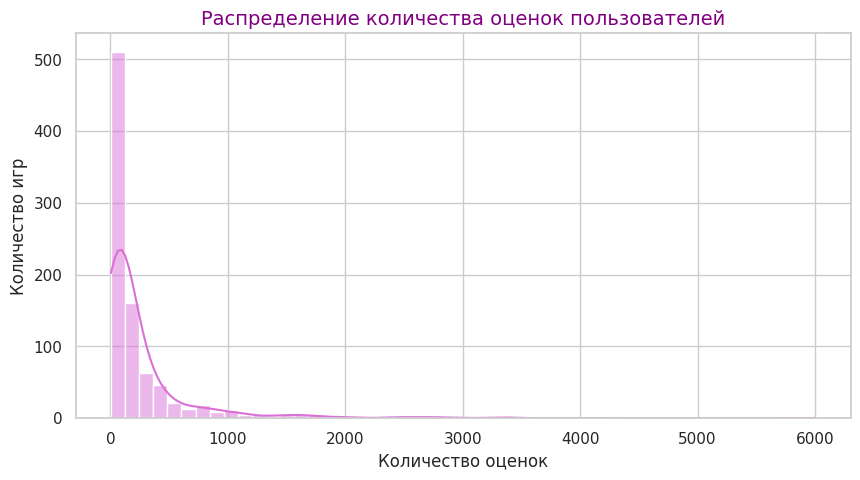

In [ ]:
sns.histplot(video_games['ratings_count'], bins=50, kde=True, color='orchid')
plt.title("Распределение количества оценок пользователей", fontsize=14, color='purple')
plt.xlabel("Количество оценок")
plt.ylabel("Количество игр")
plt.show()


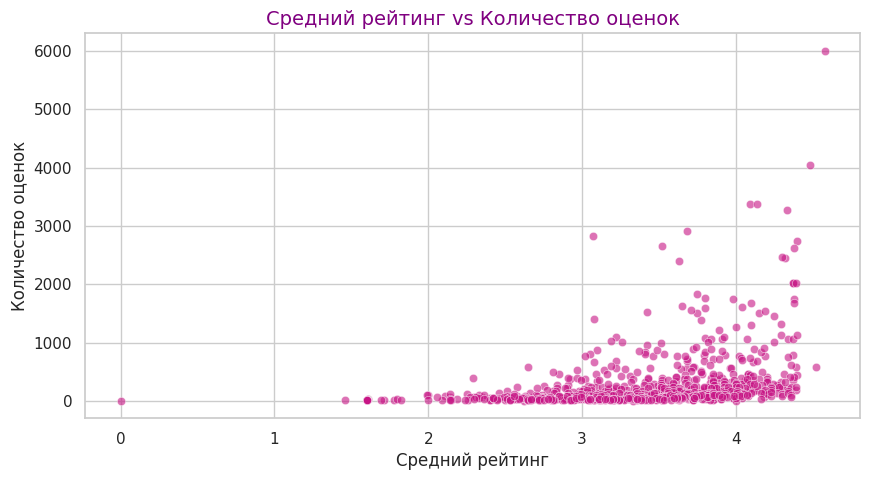

In [ ]:
sns.scatterplot(x='rating', y='ratings_count', data=video_games, alpha=0.6, color='mediumvioletred')
plt.title("Средний рейтинг vs Количество оценок", fontsize=14, color='purple')
plt.xlabel("Средний рейтинг")
plt.ylabel("Количество оценок")
plt.show()


Немного игр — супер‑популярные. Остальные — почти не заметны.

Больше отзывов = больше добавлений в вишлист. Это один и тот же «сигнал популярности».
Чем выше оценка, тем чуть дольше играют.

Чем выше средний рейтинг, тем чаще у игры больше отзывов — слабая, но есть связь.
Сильный «длинный хвост»: много игр с мало отзывами, и несколько хитов с тысячами.
Есть игры с высокой оценкой, но мало отзывов — они «не замечены».
Точки около рейтинга 0 — похоже на шум/ошибки данных.

Что делать?
* Помогать собирать первые отзывы: напоминание «Оцените игру» после 2–3 сессий,
маленькие акции «первые 100 отзывов».
* Не показывать среднюю оценку, пока мало отзывов (например, меньше 20).
* В рекомендациях смотреть не только на «топ», но и на рост за неделю.
* В маркетинге опираться на пользовательские сигналы: вишлисты, отзывы, время игры. На Metacritic — как на бонус, не как на основу.

Быстрые шаги (за 1–2 недели)

* Включить напоминание об оценке в игре/лаунчере.
* Делать отчёт раз в неделю: рост отзывов и вишлистов.

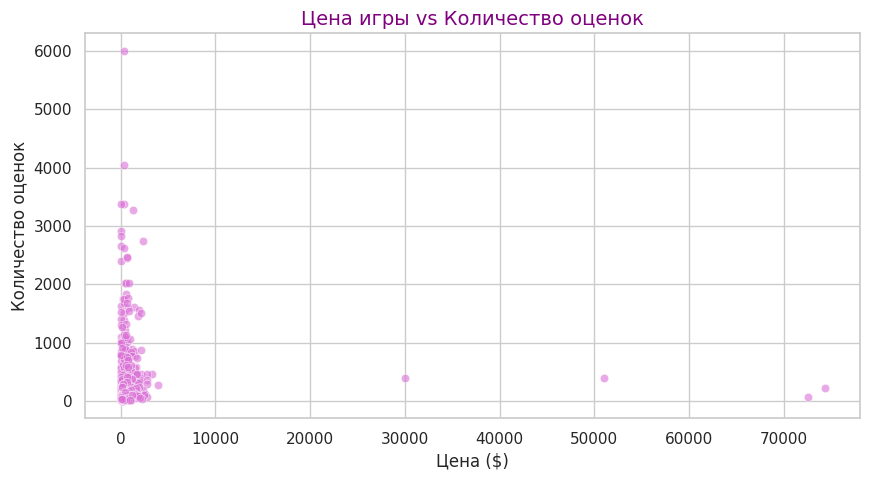

In [ ]:
sns.scatterplot(x='price', y='ratings_count', data=video_games, alpha=0.6, color='orchid')
plt.title("Цена игры vs Количество оценок", fontsize=14, color='purple')
plt.xlabel("Цена ($)")
plt.ylabel("Количество оценок")
plt.show()


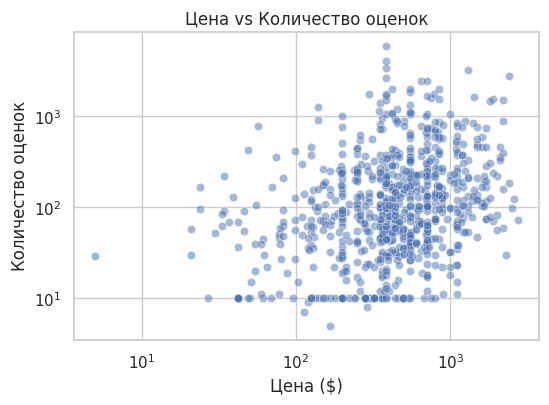

In [ ]:
# фильтр (пример: оставим адекватные цены)
q99 = video_games['price'].quantile(0.99)
df = video_games[(video_games['price'] >= 0) & (video_games['price'] <= q99)]

plt.figure(figsize=(6,4))
sns.scatterplot(x='price', y='ratings_count', data=df, alpha=0.5)
plt.title('Цена vs Количество оценок')
plt.xlabel('Цена ($)')
plt.ylabel('Количество оценок')
plt.xscale('log')     # цена в лог-шкале, чтобы «хвост» был виден
plt.yscale('log')     # по желанию: если много больших значений
plt.show()

Что видно

Ясной связи почти нет: дороже ≠ больше отзывов.
Большинство игр — в низком/обычном диапазоне цен; именно там и отзывы.
Есть странные цены 30k–75k$ — это, похоже, ошибки/бандлы. Они портят картинку.

Выводы для бизнеса

Оценки и охват идут не от цены, а от видимости и качества. Цена сама по себе не «делает» отзывы.
Дешевле — не значит больше отзывов. Нужны акции, фичеринг, сбор первых отзывов.
Работают скидки/free weekend, чтобы быстро набрать первые оценки.

Что сделать

Почистить данные: убрать/обрезать нереальные цены (например, выше 99‑го перцентиля или >150$). Отдельно пометить free‑to‑play.
Считать корреляцию и график после чистки и по жанрам.
Для витрины фокус на росте отзывов и качестве, а не на цене.

/tmp/ipython-input-1191847905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="Purples_r")


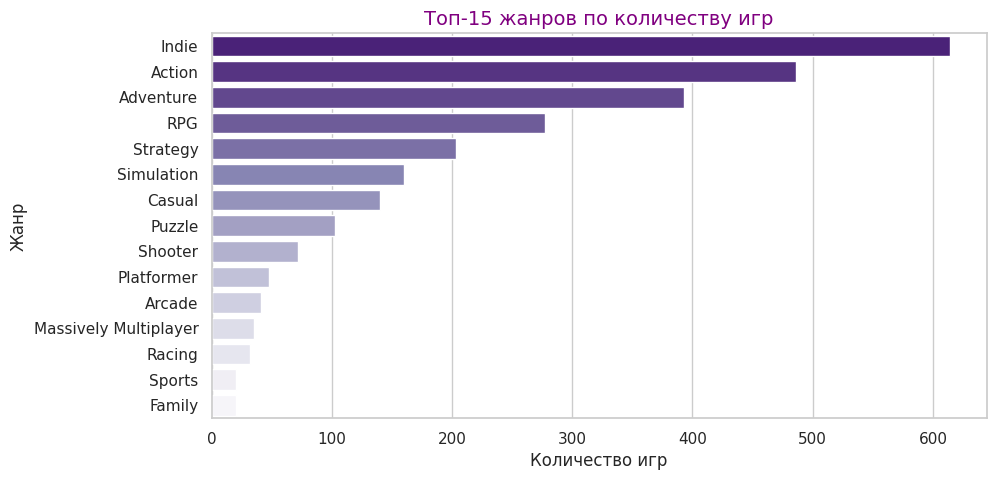

In [ ]:
genres_series = video_games['genres'].str.split(',', expand=True).stack().str.strip()
genre_counts = genres_series.value_counts().head(15)

sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="Purples_r")
plt.title("Топ-15 жанров по количеству игр", fontsize=14, color='purple')
plt.xlabel("Количество игр")
plt.ylabel("Жанр")
plt.show()


Что видно

Больше всего релизов: Indie, Action, Adventure. Рынок там перегружен.
Меньше всего: Family, Sports, Racing, MMO, Arcade — нишевые полки.
Это про “сколько выпустили”, а не про спрос/популярность.

Что это значит

В перегруженных жанрах сложнее пробиться: нужен сильный маркетинг и «фишка» игры.
В нишах конкурентов меньше, но спрос может быть слабее — надо проверять метрики интереса.

Что делать

Для витрины: отдельные подборки для нишевых жанров, чтобы их было видно.
Для запуска игры: сверить жанр со спросом — сравнить по жанрам средний рейтинг, отзывы и время игры.
И помнить: “Indie” — это скорее тег, не жанр; у игры может быть несколько жанров, поэтому суммы по барам могут превышать число игр.

Бонус: предупреждение вверху — это просто предупреждение библиотеки, на вывод не влияет.

/tmp/ipython-input-2151991908.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg.values, y=genre_avg.index, palette="OrRd_r")


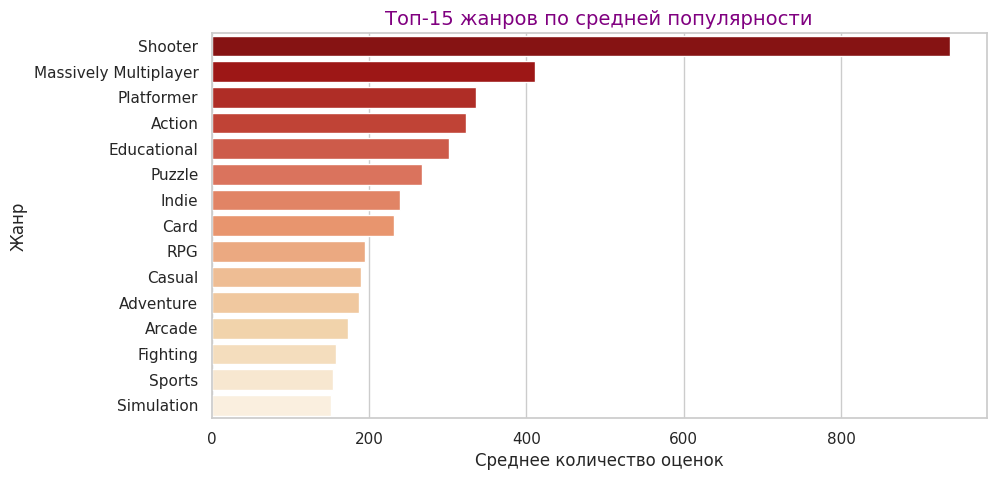

In [ ]:
# Превращаем series жанров в DataFrame и сбрасываем индекс
genres_df = genres_series.to_frame('genre').reset_index(drop=True)

# Соединяем с ratings_count по индексу
ratings_df = video_games['ratings_count'].reset_index(drop=True)
genre_ratings = pd.concat([genres_df, ratings_df], axis=1)

# Среднее количество оценок по жанру
genre_avg = genre_ratings.groupby('genre')['ratings_count'].mean().sort_values(ascending=False).head(15)

# График
sns.barplot(x=genre_avg.values, y=genre_avg.index, palette="OrRd_r")
plt.title("Топ-15 жанров по средней популярности", fontsize=14, color='purple')
plt.xlabel("Среднее количество оценок")
plt.ylabel("Жанр")
plt.show()


Что видно

Лидеры интереса: Shooter — с большим отрывом, далее MMO, Platformer, Action.
Ниже среднего: Simulation, Sports, Fighting, Arcade.
Это про среднее число оценок, не про качество игры.

Что это значит

В шутерах и MMO спрос высокий, но конкуренция тоже высокая.
Нишевые жанры брать точечно: работать с комьюнити, обзорами, акциями.
Платформеры/экшен — хороши для промо и бандлов: зритель широкий.

Что делать

Витрина: отдельные блоки по топ‑жанрам + подборка “нишевые открытия”.
Для быстрых запусков/ивентов — ставить акцент на Shooter/MMO.
Для ниш: собирать первые отзывы, работать с микро‑инфлюенсерами, делать скидки/фри‑уикенд.

Важно проверить

Среднее может врать из‑за «хитов». Посмотрите медиану по жанрам.
У жанров разное число игр. Сравните еще долю хитов и рост по неделям.
У одной игры может быть несколько жанров — это ок.

/tmp/ipython-input-2883350469.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_counts.values, y=store_counts.index, palette="PuRd_r")


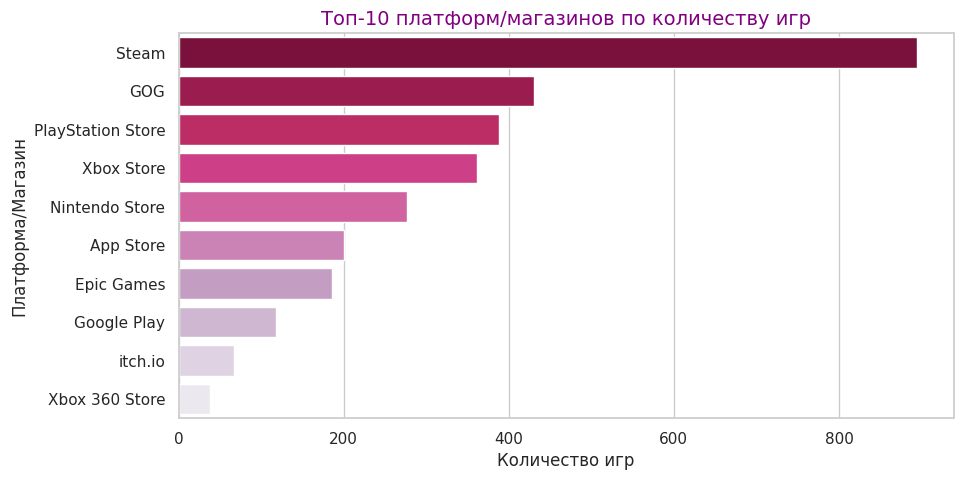

In [ ]:
stores_series = video_games['stores'].str.split(',', expand=True).stack().str.strip()
store_counts = stores_series.value_counts().head(10)

sns.barplot(x=store_counts.values, y=store_counts.index, palette="PuRd_r")
plt.title("Топ-10 платформ/магазинов по количеству игр", fontsize=14, color='purple')
plt.xlabel("Количество игр")
plt.ylabel("Платформа/Магазин")
plt.show()


Что видно

Steam — явный лидер по числу игр.
Дальше “средняя группа”: GOG, PlayStation Store, Xbox Store.
Nintendo — поменьше; App Store/Google Play и Epic — ещё меньше в этом датасете.
itch.io и Xbox 360 Store — хвост.

Как это читать

Это про количество релизов, не про продажи и не про качество.
Одна и та же игра может быть сразу в нескольких магазинах.

Что делать

Если цель максимум охвата и отзывов — сначала Steam.
Консоли (PS/Xbox) — брать, если есть бюджет на порт и сертификацию: меньше релизов, но выше чек.
GOG — хорошо для ПК‑инди/ретро (DRM‑free).
Epic — каталог меньше, но фичеринг даёт хорошую видимость.
itch.io — удобно для альф/бета и сбора раннего фидбэка.

Примечание


Сообщение сверху — это просто warning библиотеки, на график не влияет

/tmp/ipython-input-2365841606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=esrb_counts.index, y=esrb_counts.values, palette="pink_r")


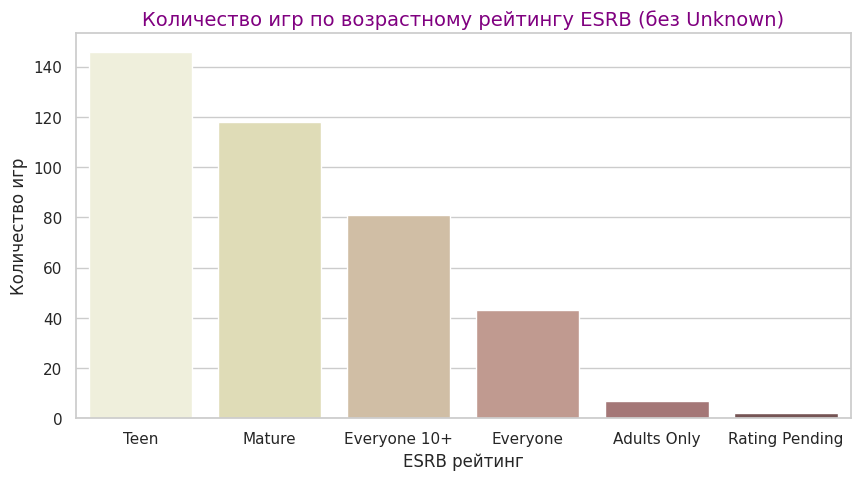

In [ ]:
esrb_counts = video_games[video_games['esrb_rating'] != 'Unknown']['esrb_rating'].value_counts()

sns.barplot(x=esrb_counts.index, y=esrb_counts.values, palette="pink_r")
plt.title("Количество игр по возрастному рейтингу ESRB (без Unknown)", fontsize=14, color='purple')
plt.xlabel("ESRB рейтинг")
plt.ylabel("Количество игр")
plt.show()




Больше всего игр: Teen и Mature.
Everyone/Everyone 10+ — средне.
Adults Only — почти нет.
Rating Pending — единицы.

Что это значит

Основная аудитория — 13–17 и 17+.
Под витрину и промо держите фокус на Teen/Mature, но делайте отдельный блок “Для всех”.

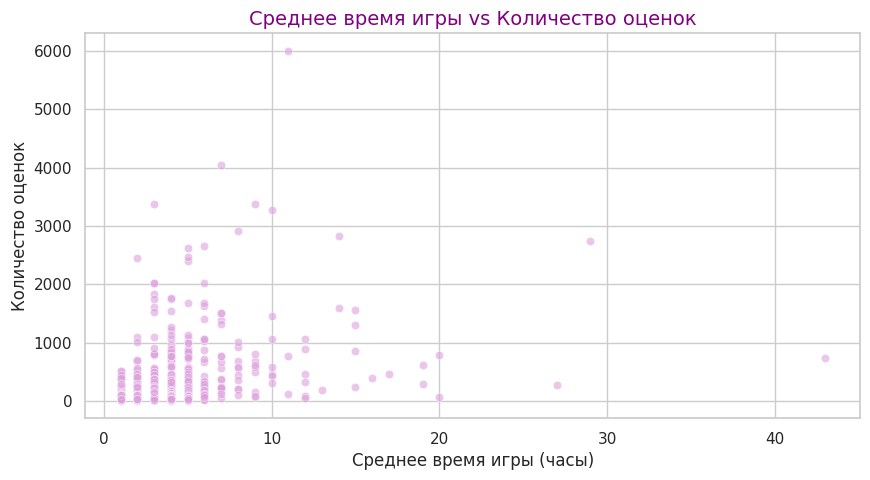

In [ ]:
sns.scatterplot(x='playtime', y='ratings_count', data=video_games, alpha=0.6, color='plum')
plt.title("Среднее время игры vs Количество оценок", fontsize=14, color='purple')
plt.xlabel("Среднее время игры (часы)")
plt.ylabel("Количество оценок")
plt.show()


Что видно

Основная кучка — 2–10 часов и до ~1000 отзывов.
Чёткой связи нет: играют дольше — отзывов чуть больше, но разброс огромный.
Есть хиты‑выбросы (6–12 часов и тысячи отзывов). Длинные игры 25–40 ч не всегда имеют много отзывов.

Выводы


Длина/время ≠ популярность. Популярность дают видимость и комьюнити.
Смотрим в паре: рост playtime + рост отзывов → таким играм даём фичеринг.
Короткие игры — просим оценку в конце прохода; длинные — после 30–60 минут или 2-й сессии.

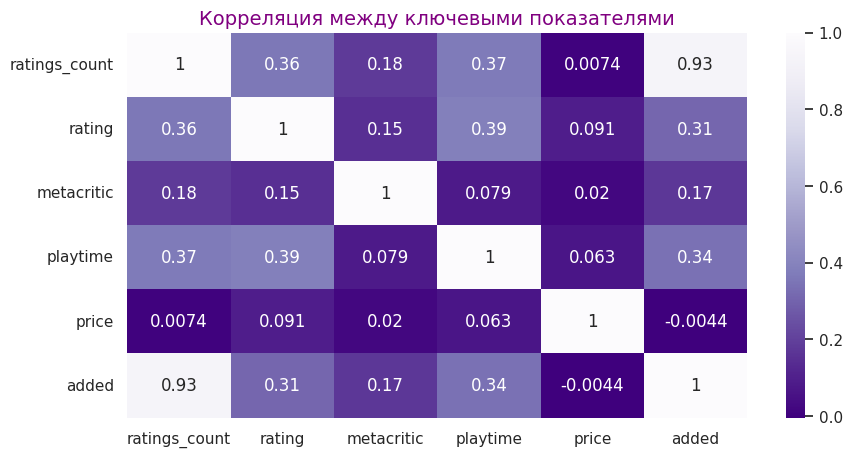

In [ ]:
corr_cols = ['ratings_count','rating','metacritic','playtime','price','added']
sns.heatmap(video_games[corr_cols].corr(), annot=True, cmap="Purples_r")
plt.title("Корреляция между ключевыми показателями", fontsize=14, color='purple')
plt.show()


Что видно

Самая сильная связь: ratings_count ↔ added ≈ 0.93 — по сути один и тот же сигнал популярности.
Умеренные связи: rating ↔ playtime ≈ 0.39; ratings_count ↔ playtime ≈ 0.37; rating ↔ ratings_count ≈ 0.36; added ↔ playtime ≈ 0.34.
Metacritic почти ни с чем не связан (≈ 0.15–0.18).
Цена почти ни на что не влияет (около 0).
Отрицательных связей нет.

Что делать

В моделях/отчётах оставлять один из пары added или ratings_count (чтобы не дублировать сигнал).
Делать упор на пользовательские метрики: отзывы, добавления, время игры. Metacritic и цена — вторично.
Собирать первые отзывы и продвигать игры с быстрым ростом этих метрик.

## Общий вывод:

Главное


Рынок «хиты и длинный хвост»: пару игр видят все, тысячи — почти никто.
Популярность дают пользовательские сигналы: отзывы (ratings_count), добавления в вишлист (added), время в игре. Они тесно связаны между собой.
Оценки критиков (Metacritic) и цена почти не предсказывают интерес игроков.
Длина игры сама по себе не делает её популярной.
По жанрам: шутеры и MMO в среднем собирают больше интереса; Indie/Action/Adventure перегружены количеством релизов.
По платформам: сначала Steam для охвата; остальные — по задаче и бюджету.
По возрастам: основная аудитория Teen/Mature (после удаления Unknown).

Что делать (простые шаги)

Витрина
Показывать и хиты, и «Набирают обороты» (быстрый рост за неделю).
Подсвечивать «Высокий рейтинг, мало отзывов» — там могут быть будущие хиты.
Отзывы
Попросить оценку после 2–3 сессий (короткие игры — в конце прохода).
Не показывать среднюю оценку, пока мало отзывов (например, <20).
Использовать «честный» взвешенный рейтинг (как у IMDb), чтобы не было перекоса от 5–10 отзывов.
Маркетинг
Опираться на вишлисты, отзывы и время игры; Metacritic — как бонус.
Скидки и free weekend — быстрый способ собрать первые отзывы.
Для ниш — работать с комьюнити и микро‑инфлюенсерами.
Ранжирование и рекомендации
Считать рост (velocity) по неделям и давать таким играм фичеринг.
Не дублировать сигналы: использовать либо ratings_count, либо added (они почти одно и то же).
Заложить 10–20% трафика на «исследование» новых/нишевых игр.
Сегменты
Жанры: шутер/MMO — хорошие кандидаты для акций; в перегруженных жанрах нужна яркая «фишка».
Платформы: старт с Steam; GOG — для ПК‑инди/ретро; Epic — меньше игр, но фичеринг мощный; itch.io — для ранних билдов.
Возраст: основной фокус Teen/Mature, отдельный блок «Для всех».

Чистка данных (чтобы графики и ранжирование были честными)


Убрать/скрыть ESRB = Unknown.
Обрезать нереальные цены (очистить хвосты и бандлы).
Убрать нулевые/подозрительные рейтинги.

Метрики и отчёты

Раз в неделю: рост отзывов, вишлистов и времени игры (лучше смотреть рост, а не только абсолют).
Смотреть медиану по жанрам (среднее часто портят «суперхиты»).
Для счётчиков использовать лог‑метрики (например, log1p), чтобы хвост не «ломал» анализ.
A/B‑тест: когда просить отзыв, как ранжировать «Набирают обороты».

Итог


Видимость и социальные сигналы важнее цены и критиков. Задача — быстро собирать первые отзывы/вишлисты, продвигать игры с ростом, честно показывать рейтинг и давать шанс качественным, но малоизвестным проектам. Это повысит открываемость витрины и суммарный охват каталога.